In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.append('/mnt/r/ENGR_Chon/Dong/Github_private/Pulsewatch_labeling/DeepBeat/experiments/try_07_eval_models')
import my_model_names

# Combine all dataframes together.
path_all_csv = r'/mnt/r/ENGR_Chon/Dong/Python_generated_results/deep_learning_2023/analysis_2024_07_30/fold_1_2_combined_subject_independent_test'
test_name = 'fold_1_2_combined_subject_independent_test'
list_str_model_idx = ['18','19','20','01','02','03','21','22','07','23','24','05','06','08','10','12']
df_all = []
for str_model_idx in list_str_model_idx:
    path_ckpt, file_date, model_name = my_model_names.my_model_names(str_model_idx)
    if str_model_idx == '14' or str_model_idx == '16' or str_model_idx == '17':
        this_df = pd.read_excel(os.path.join(path_ckpt,model_name+'.xlsx'),index_col=0)
    else:
        this_df = pd.read_csv(os.path.join(path_all_csv,str_model_idx+'_'+model_name+'_'+test_name+'.csv'),index_col=0)
    this_df = this_df.rename(columns={'index': 'class'})
    new_col = [str_model_idx] * this_df.shape[0] # rows
    this_df.insert(0,'str_model_idx',new_col) 
    new_col = [model_name] * this_df.shape[0] # rows
    this_df.insert(1,'model_name',new_col) 

    # Convert the 0-1 value to percentage.
    this_df['TPR'] = this_df['TPR'] * 100
    this_df['TNR'] = this_df['TNR'] * 100
    this_df['PPV'] = this_df['PPV'] * 100
    this_df['NPV'] = this_df['NPV'] * 100
    this_df['FPR'] = this_df['FPR'] * 100
    this_df['FNR'] = this_df['FNR'] * 100
    this_df['FDR'] = this_df['FDR'] * 100
    this_df['ACC'] = this_df['ACC'] * 100
    this_df['micro_auroc'] = this_df['micro_auroc'] * 100
    this_df['macro_auroc'] = this_df['macro_auroc'] * 100
    
    print(this_df.columns)
    
    if len(df_all) < 1:
        df_all = this_df.copy()
    else:
        df_all = pd.concat([df_all, this_df], ignore_index=True, sort=False)

# df_all[['avg_TPR', 'avg_TNR', 'avg_PPV',
#     'avg_NPV', 'avg_FPR', 'avg_FNR', 'avg_FDR', 'avg_ACC',
#     'avg_micro_auroc', 'avg_macro_auroc']].round(decimals=3)
print(df_all)
filename_output = test_name+'_all_models.csv'
df_all.to_csv(os.path.join(path_all_csv,filename_output),header=True,index=False)

/home/doh16101/anaconda3/envs/CS330_torch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx', 'model_name', 'class', 'TPR', 'TNR', 'PPV', 'NPV',
       'FPR', 'FNR', 'FDR', 'ACC', 'micro_auroc', 'macro_auroc'],
      dtype='object')
Index(['str_model_idx'

In [2]:
def my_convert_model_name(model_name):
    if model_name == 'Poh_2018_Heart_same_subject_test':
        output_name = 'Poh et al.'
    elif model_name == 'Han_2020_Sensors_same_subject_test':
        output_name = 'Han at al.'
    elif model_name == '2D_TFS_ROS_ImageNet_weights':
        output_name = '2D TFS'
    elif model_name == '2D_Poin_ROS_ImageNet_weights':
        output_name = '2D Poincare'
    elif model_name == '1D_PPG_batch32':
        output_name = '1D PPG'
    elif model_name == '1D_PPG_batch512':
        output_name = '1D PPG (batch size 512)'
    elif model_name == '1D_PPG_HR':
        output_name = '1D PPG+HR'
    elif model_name == '1D_PPG_HR_ACC':
        output_name = '1D PPG+HR+ACC'
    elif model_name == '1D_HR_ACC_noPPG':
        output_name = '1D HR+ACC'
    elif model_name == '1D_PPG_WEPD-HR_ACC_rescale-WEPD-HR':
        output_name = '1D all four sig.'
    elif model_name == '1D_PPG_Elgendi-HR_ACC':
        output_name = '1D PPG + HR + ACC (Elgendi et al.)'
    elif model_name == '1D_PPG_Elgendi-HR_ACC_rescale-Elgendi-HR':
        output_name = '1D all four sig. (E. peak)'
    elif model_name == '1D_PPG_WEPD-HR_ACC_rescale-HR_aug30k':
        output_name = '1D four channels (augmented 30k)'
    elif model_name == '1D_PPG_WEPD-HR_ACC_rescale-HR_aug5k':
        output_name = '1D all four sig. (aug.)'
    elif model_name == 'Liu_2022_JAHA_retrained_Pulsewatch_PPG_only':
        output_name = 'Liu et al. (retrained)'
    elif model_name == 'Liu_2022_JAHA_retrained_Pulsewatch_four_channels':
        output_name = 'Liu et al. (retrained, four sig.)'
    elif model_name == 'Darren_2024_EMBC':
        output_name = 'Chen et al. (retrained, four sig.)'
    elif model_name == '1D_PPG_ACC_only':
        output_name = '1D PPG+ACC'
    elif model_name == '1D_HR_only':
        output_name = '1D HR'
    elif model_name == '1D_HR_rescaleHR_only':
        output_name = '1D HR+rescaled HR'
    elif model_name == '1D_HR_rescaleHR_ACC_noPPG':
        output_name = '1D HR+rescaled HR+ACC'

    return output_name

['Liu_2022_JAHA_retrained_Pulsewatch_PPG_only', 'Liu_2022_JAHA_retrained_Pulsewatch_PPG_only', 'Liu_2022_JAHA_retrained_Pulsewatch_PPG_only', 'Liu_2022_JAHA_retrained_Pulsewatch_four_channels', 'Liu_2022_JAHA_retrained_Pulsewatch_four_channels', 'Liu_2022_JAHA_retrained_Pulsewatch_four_channels', 'Darren_2024_EMBC', 'Darren_2024_EMBC', 'Darren_2024_EMBC', '2D_TFS_ROS_ImageNet_weights', '2D_TFS_ROS_ImageNet_weights', '2D_TFS_ROS_ImageNet_weights', '2D_Poin_ROS_ImageNet_weights', '2D_Poin_ROS_ImageNet_weights', '2D_Poin_ROS_ImageNet_weights', '1D_PPG_batch32', '1D_PPG_batch32', '1D_PPG_batch32', '1D_PPG_ACC_only', '1D_PPG_ACC_only', '1D_PPG_ACC_only', '1D_HR_only', '1D_HR_only', '1D_HR_only', '1D_HR_ACC_noPPG', '1D_HR_ACC_noPPG', '1D_HR_ACC_noPPG', '1D_HR_rescaleHR_only', '1D_HR_rescaleHR_only', '1D_HR_rescaleHR_only', '1D_HR_rescaleHR_ACC_noPPG', '1D_HR_rescaleHR_ACC_noPPG', '1D_HR_rescaleHR_ACC_noPPG', '1D_PPG_HR', '1D_PPG_HR', '1D_PPG_HR', '1D_PPG_HR_ACC', '1D_PPG_HR_ACC', '1D_PPG_HR_

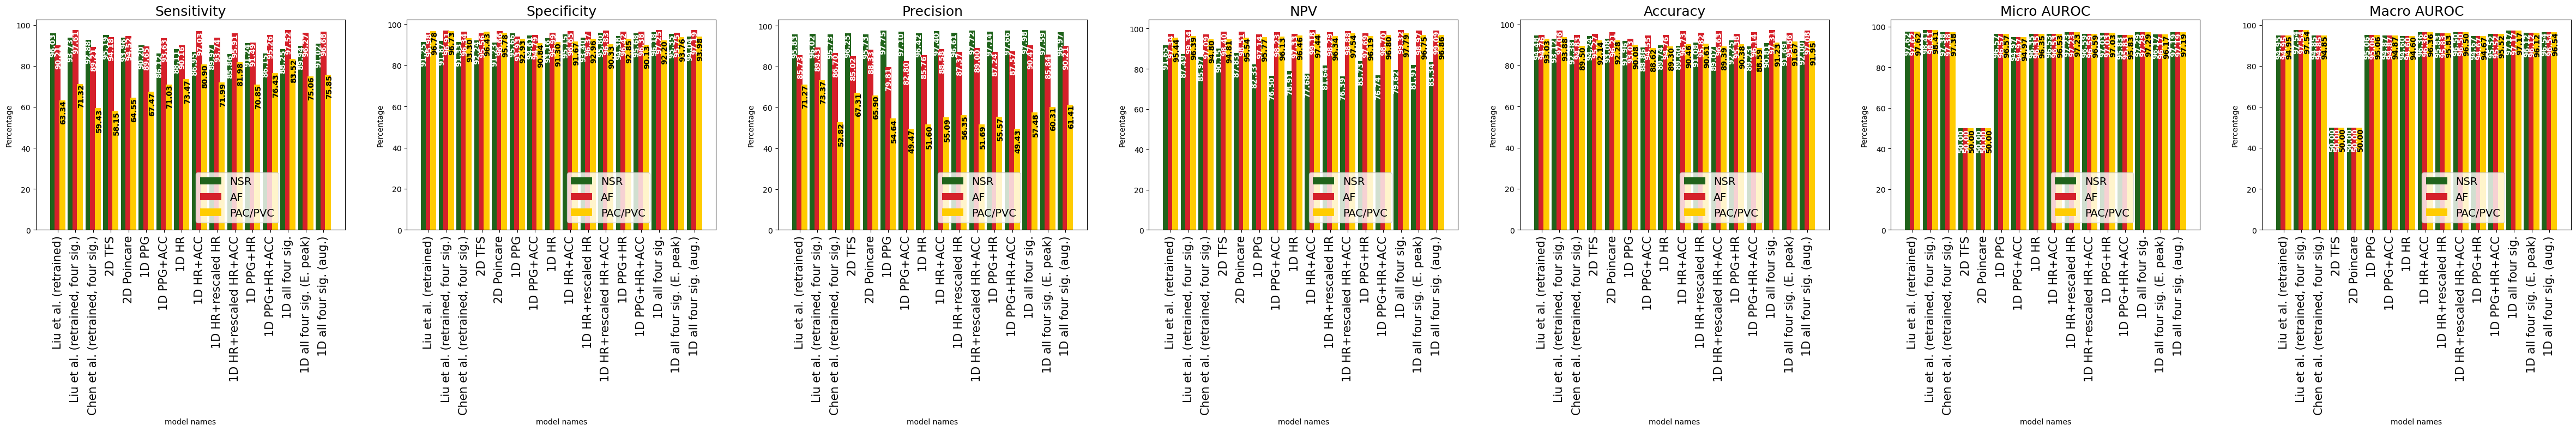

In [3]:
my_col_names = ['TPR', 'TNR', 'PPV', 'NPV', 'ACC',
       'micro_auroc', 'macro_auroc']
my_plot_names = ['Sensitivity', 'Specificity', 'Precision', 'NPV', 'Accuracy',
       'Micro AUROC', 'Macro AUROC']
import matplotlib.pyplot as plt
# plt.figure(figsize=(50,20))

fig, axs = plt.subplots(1, 7, figsize=(60, 5))
color_green = (32, 99, 27) #'#20631B'
color_red = (213, 32, 42) #'#FF7575'
color_yellow = (255, 204, 0) #'#FFCC00'
for this_idx, this_col_name in enumerate(my_col_names):
    this_df = df_all[['str_model_idx','model_name','class',this_col_name]]
    temp_df = this_df.loc[this_df['class'] == 0]
    col_0 = temp_df[this_col_name].to_numpy()

    temp_df = this_df.loc[this_df['class'] == 1]
    col_1 = temp_df[this_col_name].to_numpy()

    temp_df = this_df.loc[this_df['class'] == 2]
    col_2 = temp_df[this_col_name].to_numpy()

    # col_0 = np.expand_dims(col_0, axis=1)
    # col_1 = np.expand_dims(col_1, axis=1)
    # col_2 = np.expand_dims(col_2, axis=1)
    # import numpy as np
    col_plot = np.concatenate((np.expand_dims(col_0, axis=1), np.expand_dims(col_1, axis=1), np.expand_dims(col_2, axis=1)), axis=1)
    if this_col_name[-5:] == 'auroc' or this_col_name[-3:] == 'ACC':
        plot_y_min = np.min(col_plot[4:,:])
        plot_y_max = np.max(col_plot[4:,:])
    else:
        plot_y_min = np.min(col_plot)
        plot_y_max = np.max(col_plot)
    this_seq = this_df['model_name'].values.tolist()
    print(this_seq)

    def f7(seq):
        seen = set()
        seen_add = seen.add
        return [x for x in seq if not (x in seen or seen_add(x))]

    list_model_name = f7(this_seq)
    list_converted_model_name = []
    for this_name in list_model_name:
        this_converted_name = my_convert_model_name(this_name)
        list_converted_model_name.append(this_converted_name)

    x = np.arange(0,len(list_converted_model_name)*1.5,1.5)
    width = 0.5


    # plt.subplot(my_subplot_idx[this_idx])
    # plt.title(this_col_name, fontsize=18)
    axs[this_idx].set_title(my_plot_names[this_idx], fontsize=18)
    # if this_idx == 0:
    axs[this_idx].bar(x-width+0.1, col_0, width, label='NSR', color=np.array(color_green)/255) # Dark blue
    axs[this_idx].bar(x, col_1, width, label='AF', color=np.array(color_red)/255) # Pink
    axs[this_idx].bar(x+width-0.1, col_2, width, label='PAC/PVC',color=np.array(color_yellow)/255) # Yellow

    # else:
    #     axs[this_idx].bar(x-width, col_0, width, color=np.array(color_green)/255) # Dark blue
    #     axs[this_idx].bar(x, col_1, width, color=np.array(color_red)/255) # Pink
    #     axs[this_idx].bar(x+width, col_2, width, color=np.array(color_yellow)/255) # Yellow

    text_adjust_x = 0.05
    for xx,yy in zip(x-width+text_adjust_x,col_0):
        axs[this_idx].text(xx+0.05, yy, '{:.2f}'.format(yy), color='white', fontweight='bold', horizontalalignment='center', verticalalignment='top',rotation = 90)
    for xx,yy in zip(x+text_adjust_x,col_1):
        axs[this_idx].text(xx, yy, '{:.2f}'.format(yy), color='white', fontweight='bold', horizontalalignment='center', verticalalignment='top',rotation = 90)
    for xx,yy in zip(x+width+text_adjust_x,col_2):
        axs[this_idx].text(xx-0.05, yy, '{:.2f}'.format(yy), color='black', fontweight='bold', horizontalalignment='center', verticalalignment='top',rotation = 90)

    axs[this_idx].set_xlabel('model names')
    axs[this_idx].set_ylabel('Percentage')
    axs[this_idx].set_xticks(x, list_converted_model_name, fontsize=15,rotation=90)
    # ax = plt.gca()
    # axs[this_idx].set_ylim((plot_y_min-0.2*(plot_y_max-plot_y_min), 100))
    # if this_idx == 0:
    axs[this_idx].legend(loc='upper left', bbox_to_anchor=(0.5, 0.3), ncol=1, labelspacing=0.5, fontsize=14)


# plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(path_all_csv,test_name+'_all_journal'+'.png'), dpi=300, bbox_inches='tight')


In [4]:
os.path.join(path_all_csv,test_name+'_all'+'.png')

'/mnt/r/ENGR_Chon/Dong/Python_generated_results/deep_learning_2023/analysis_2024_07_30/fold_1_2_combined_subject_independent_test/fold_1_2_combined_subject_independent_test_all.png'